#### 1. LSTM을 이용한 로이터 뉴스 카테고리 분류
---

In [3]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

In [5]:
# 학습셋과 데이터셋 분리
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
import numpy as np

category = np.max(y_train) + 1

print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
from tensorflow.keras.preprocessing import sequence

# 단어의 수 세팅
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [11]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

# 모델 구조 설정
model = Sequential()

model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# 모델 실행 옵션
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.3971 - loss: 2.4615 - val_accuracy: 0.5419 - val_loss: 1.7714
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5341 - loss: 1.7842 - val_accuracy: 0.5539 - val_loss: 1.7222
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5642 - loss: 1.6575 - val_accuracy: 0.5841 - val_loss: 1.6194
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.6068 - loss: 1.5280 - val_accuracy: 0.6376 - val_loss: 1.4653
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6592 - loss: 1.3428 - val_accuracy: 0.6696 - val_loss: 1.2913
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7105 - loss: 1.1411 - val_accuracy: 0.7035 - val_loss: 1.2025
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7371 - loss: 1.0376 - val_accuracy: 0.7110 - val_loss: 1.1529
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7526 - loss: 0

<br>

##### 실습 | LSTM을 이용해 로이터 뉴스 카테고리 분석하기
---

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.3912 - loss: 2.4323 - val_accuracy: 0.5472 - val_loss: 1.7716
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5458 - loss: 1.6959 - val_accuracy: 0.5717 - val_loss: 1.6705
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5990 - loss: 1.5607 - val_accuracy: 0.6260 - val_loss: 1.4861
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6528 - loss: 1.3426 - val_accuracy: 0.6447 - val_loss: 1.3881
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6899 - loss: 1.2059 - val_accuracy: 0.6857 - val_loss: 1.2295
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7250 - loss: 1.0658 - val_accuracy: 0.6888 - val_loss: 1.2130
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7551 - loss: 0.9765 - val_accuracy: 0.7106 - val_loss: 1.1529
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7880 - loss: 0

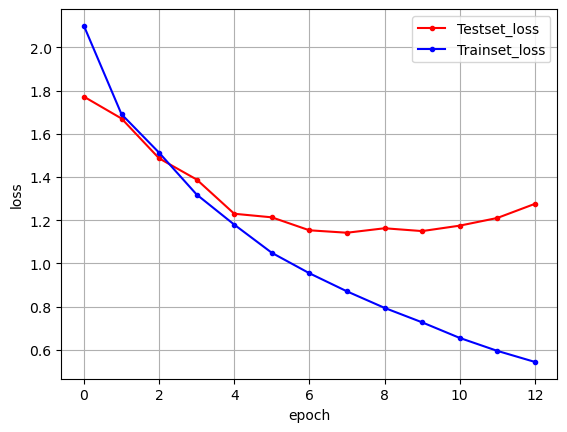

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도
print('\nTest Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<br>

#### 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기
---

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# 테스트셋 지정
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D

# 모델 구조 설정
model = Sequential()

model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

<br>

##### 실습 | LSTM과 CNN을 조합해 영화 리뷰 분류하기
---

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step - accuracy: 0.7092 - loss: 0.5186 - val_accuracy: 0.8654 - val_loss: 0.3082
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9061 - loss: 0.2404 - val_accuracy: 0.8763 - val_loss: 0.3190
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.9337 - loss: 0.1783 - val_accuracy: 0.8946 - val_loss: 0.2719
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.9464 - loss: 0.1434 - val_accuracy: 0.8907 - val_loss: 0.2920
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.9611 - loss: 0.1102 - val_accuracy: 0.8642 - val_loss: 0.4015
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9714 - loss: 0.0791 - val_accuracy: 0.8792 - val_loss: 0.3674
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8705 - loss: 0.3904
Test Accuracy: 0.8711


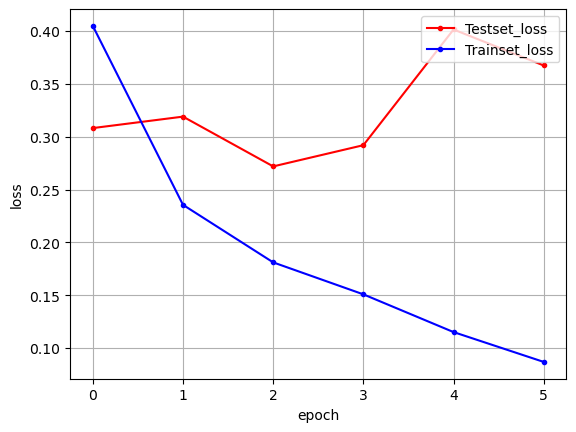

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 테스트셋 지정
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델 구조 설정
model = Sequential()

model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 시각화
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()